# 数列クラス

## 項クラス

In [1]:
class term:
    def __init__(self, val, index):
        self.val = val
        self.ind = index
    
    def show(self):
        return '(index={}, val={})'.format(self.ind, self.val)

## 隣接二項漸化式を持つ数列

In [31]:
class seq:
    '''Sequence with a reccurence relation'''
    
    def __init__(self, initial, func):
        self.initial = term(initial, 1)
        self.func = func
        
    def get_next(self, trm):
        return term(self.func(trm.val), trm.ind + 1)
    
    def nth(self, n):
        t = self.initial
        for i in range(1,n):
            t = self.get_next(t)
        else: return t
    
    def show(self, num=5):
        terms = [self.initial]
        for i in range(num):
            terms.append(self.get_next(terms[-1]))
        return [t.val for t in terms]

In [23]:
ss = seq(5, (lambda x: 3*x - 2))

t = ss.initial
for i in range(10):
    print(mterm.show())
    t = ss.get_next(t)
    
fifth = ss.nth(5); print(fifth.show())

print(ss.show(20))

(index=11, val=236197)
(index=11, val=236197)
(index=11, val=236197)
(index=11, val=236197)
(index=11, val=236197)
(index=11, val=236197)
(index=11, val=236197)
(index=11, val=236197)
(index=11, val=236197)
(index=11, val=236197)
(index=5, val=325)
[5, 13, 37, 109, 325, 973, 2917, 8749, 26245, 78733, 236197, 708589, 2125765, 6377293, 19131877, 57395629, 172186885, 516560653, 1549681957, 4649045869, 13947137605]


## フィボナッチ数列

### クラス定義

In [33]:
class fib():
    def __init__(self, init1, init2, func = (lambda x, y: x+y)):
        self.initial = (term(init1,1), term(init2,2))
        self.func = func
    
    def get_next(self, trm1, trm2):
        return term(self.func(trm1.val, trm2.val), trm2.ind + 1)
    
    def nth(self, n):
        prev = self.initial
        for i in range(n-2):
            t = self.get_next(*prev)
            prev = (prev[-1], t)
        else: return t

### 実験

In [34]:
ff = fib(1,1)

prev = ff.initial
for i in range(10):
    print(prev[0].show())
    prev = (prev[1], ff.get_next(*prev))

(index=1, val=1)
(index=2, val=1)
(index=3, val=2)
(index=4, val=3)
(index=5, val=5)
(index=6, val=8)
(index=7, val=13)
(index=8, val=21)
(index=9, val=34)
(index=10, val=55)


In [29]:
import math

print(ff.nth(100).show())
print(int(math.log10(ff.nth(10**6).val)))

(index=100, val=354224848179261915075)
208987


In [30]:
ff = fib(-1,5)
prev = ff.initial
fibseq = [t for t in prev]
for i in range(10):
    fibseq.append(ff.get_next(fibseq[-2], fibseq[-1]))
print([t.val for t in fibseq])

[-1, 5, 4, 9, 13, 22, 35, 57, 92, 149, 241, 390]


### 二項間の比の収束

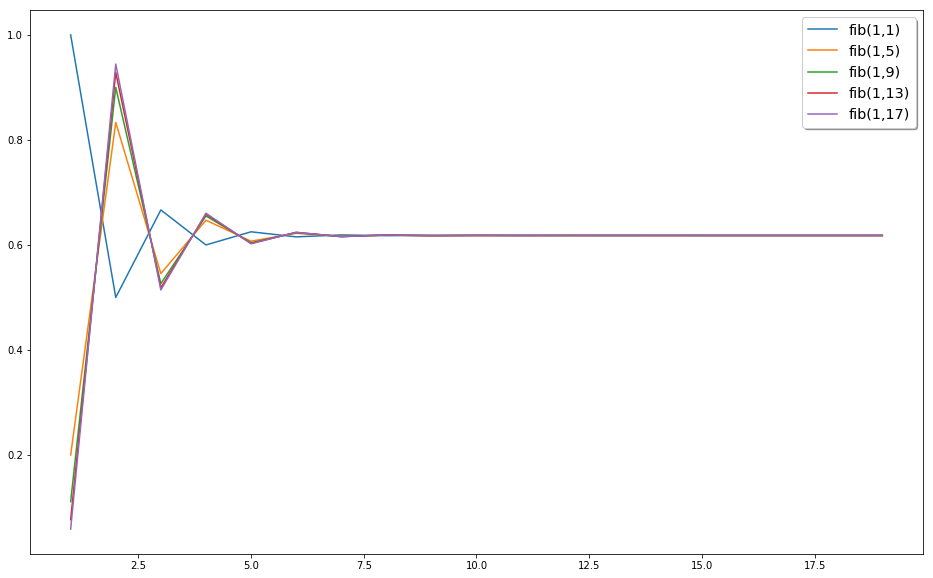

In [247]:
import matplotlib.pyplot as plt
%matplotlib inline

N = 20
X = range(1,N)

plt.figure(figsize=(16,10))

for k in range(1,20,4):
    ff = fib(1,k)
    fibseq = list(ff.initial)
    Y = []
    for i in range(1,N):
        Y.append(fibseq[-2].val/fibseq[-1].val) 
        fibseq.append(ff.get_next(fibseq[-2], fibseq[-1]))
    plt.plot(X, Y, label='fib(1,{})'.format(k))

plt.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()